<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/K_2_Video_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q albumentations opencv-python-headless


In [38]:
!pip install wget

In [59]:
# Import required libraries
import os
import wget
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Albumentations specific imports
from albumentations import Compose, RandomBrightnessContrast, Blur, HorizontalFlip


In [56]:
# Create a folder for images
os.makedirs('nature_images', exist_ok=True)

# List of sample open-license nature images
nature_urls = [
    "https://images.unsplash.com/photo-1506744038136-46273834b3fb",
    "https://images.unsplash.com/photo-1506748686214-e9df14d4d9d0",
    "https://images.unsplash.com/photo-1500530855697-b586d89ba3ee",
    "https://images.unsplash.com/photo-1503264116251-35a269479413",
    "https://images.unsplash.com/photo-1502086223501-7ea6ecd79368"
]

# Download images
for idx, url in enumerate(nature_urls):
    wget.download(url, out=f'nature_images/nature_{idx}.jpg')

print("Nature images downloaded.")


Nature images downloaded.


In [57]:
# Load downloaded images as frames
frame_paths = sorted(os.listdir('nature_images'))
original_frames = []

for path in frame_paths:
    frame = cv2.imread(os.path.join('nature_images', path))
    frame = cv2.resize(frame, (128, 128))
    original_frames.append(frame)

print(f"Loaded {len(original_frames)} frames.")


Loaded 19 frames.


In [60]:
# Define augmentation pipeline
augmentation_pipeline = Compose([
    RandomBrightnessContrast(p=0.5),
    Blur(blur_limit=3, p=0.5),
    HorizontalFlip(p=0.5)
])


In [61]:
# Apply augmentation
augmented_frames = [augmentation_pipeline(image=frame)["image"] for frame in original_frames]

print("Augmented frames created.")


Augmented frames created.


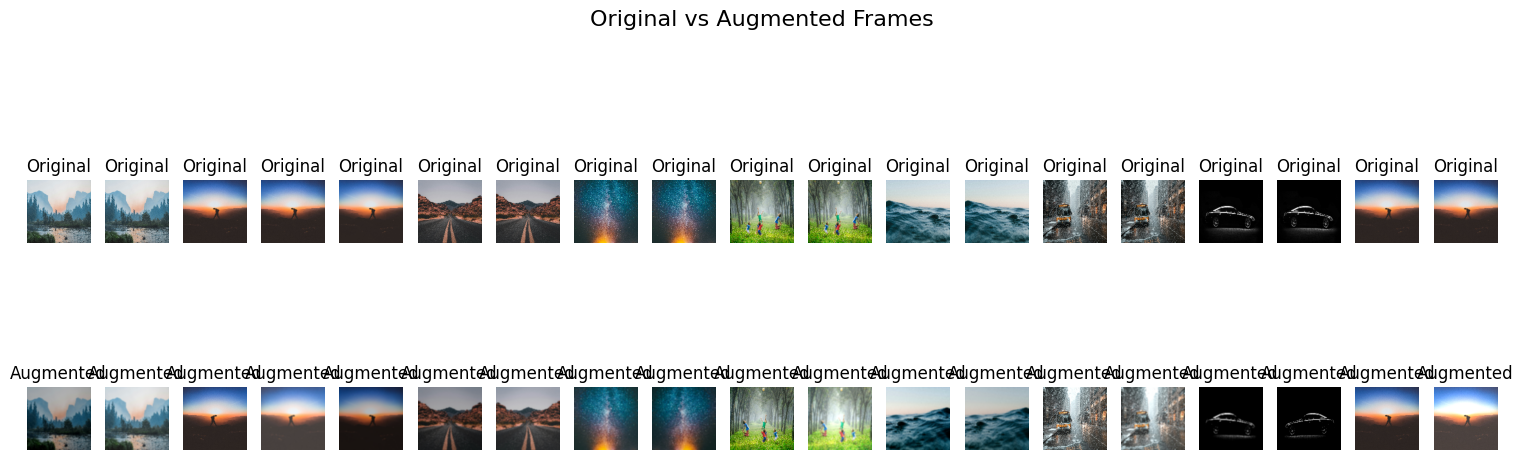

In [62]:
# Plot original and augmented frames side by side
fig, axes = plt.subplots(2, len(original_frames), figsize=(15, 6))

for idx in range(len(original_frames)):
    axes[0, idx].imshow(cv2.cvtColor(original_frames[idx], cv2.COLOR_BGR2RGB))
    axes[0, idx].set_title("Original")
    axes[0, idx].axis('off')

    axes[1, idx].imshow(cv2.cvtColor(augmented_frames[idx], cv2.COLOR_BGR2RGB))
    axes[1, idx].set_title("Augmented")
    axes[1, idx].axis('off')

plt.suptitle("Original vs Augmented Frames", fontsize=16)
plt.tight_layout()
plt.show()


In [63]:
# Create directory for videos
os.makedirs('nature_videos', exist_ok=True)

# Save original frames as a video
out_original = cv2.VideoWriter('nature_videos/original_video.avi', cv2.VideoWriter_fourcc(*'XVID'), 2.0, (128, 128))

for frame in original_frames:
    out_original.write(frame)

out_original.release()

print("Original video saved.")


Original video saved.


In [64]:
# Save augmented frames as a video
out_augmented = cv2.VideoWriter('nature_videos/augmented_video.avi', cv2.VideoWriter_fourcc(*'XVID'), 2.0, (128, 128))

for frame in augmented_frames:
    out_augmented.write(frame)

out_augmented.release()

print("Augmented video saved.")


Augmented video saved.
